
# Analytic ROC curve: Solution

The false positive and true positive probabilities are given by the shaded area in the following plot:


![](TPFP.png)

So we need to calculate the probability to the right of a theshold $t$:

$$\int\limits_t^\infty p(x) =  \frac{1}{\sqrt{2\pi}\sigma}\int\limits_t^\infty e^{-\frac{1}{2\sigma^2}(x-\mu)^2} $$

$$ y = \frac{x-\mu}{\sqrt{2}\sigma}\;,\qquad dy = \frac{dx}{\sqrt{2}\sigma}$$

$$=  \frac{1}{\sqrt{\pi}}\int\limits_{y_{min}}^\infty e^{-y^2} = \frac{1}{\sqrt{\pi}} \frac{\sqrt{\pi}}{2}\;\frac{2}{\sqrt{\pi}}\int\limits_{y_{min}}^\infty e^{-y^2} = \frac{1}{2}\left(1-{\rm erf}(y_{min})\right) $$

With $y_{min} = \frac{t-\mu}{\sqrt{2}\sigma}$

The true positives are given by 

$$TP = \int\limits_t^\infty p(x) =  \frac{1}{\sqrt{2\pi}\sigma_+}\int\limits_t^\infty e^{-\frac{1}{2\sigma_+^2}(x-\mu_+)^2} = \frac{1}{2}\left(1-{\rm erf}\left(\frac{t-\mu_+}{\sqrt{2}\sigma_+}\right)\right)$$

The false positives are given by 

$$FP = \int\limits_t^\infty p(x) =  \frac{1}{\sqrt{2\pi}\sigma_-}\int\limits_t^\infty e^{-\frac{1}{2\sigma_-^2}(x-\mu_-)^2} = \frac{1}{2}\left(1-{\rm erf}\left(\frac{t-\mu_-}{\sqrt{2}\sigma_-}\right)\right)$$



so we can solve for $t$ as a function of FP: 
    
$$ t = \mu_- + \sqrt{2}\sigma_-{\rm erf}^{-1}(1-2FP  )$$    

and inserting in the expression for TP we get:

$$TP = \frac{1}{2}\left( 1-{\rm erf}\left( \frac{\mu_- + \sqrt{2}\sigma_-{\rm erf}^{-1}(1-2FP  )- \mu_+}{\sqrt2 \sigma_+}\right)  \right)$$

We can plot it for an example:

In [1]:
from scipy.special import erf, erfinv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mu1 = -1
sigma1 = 1

mu2 = 3
sigma2 = 2


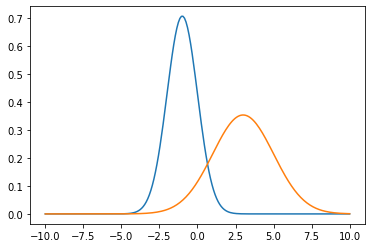

In [3]:
xs = np.linspace(-10,10,200)
f1 = 1.0/(np.sqrt(2)*sigma1)*np.exp( -(xs - mu1)**2/(2*sigma1**2) )
f2 = 1.0/(np.sqrt(2)*sigma2)*np.exp( -(xs - mu2)**2/(2*sigma2**2) )

plt.plot(xs, f1)
plt.plot(xs, f2)

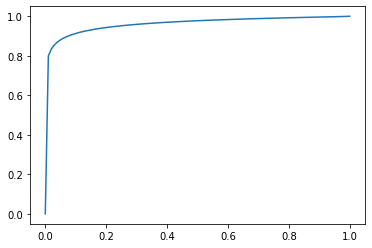

In [4]:
def TPofFP(FP):
    sqrt2 = np.sqrt(2)
    return  0.5* ( 1 - erf( 
        (mu1 + sqrt2*sigma1*erfinv(1-2*FP)- mu2)/(sqrt2 * sigma2)) )

xs = np.linspace(0,1,100)

plt.plot(xs, TPofFP(xs))

## ii) 

first we need the number of false positives and false negatives. For a number $N$ of cases of each class we have:

$$FP =N\int\limits_t^\infty p_-(x) dx$$ and $$FN =N\int\limits_{-\infty}^t p_+(x) dx$$ 

with $t$ the threshold. The cost $C$ of misclassification is proportional to:

$$C = a FP + FN = N\left(a \int\limits_t^\infty p_-(x) dx + \int\limits_{-\infty}^t p_+(x) dx \right)$$

To minimize the cost, we differentiate with respect to $t$:

$$\frac{dC}{dt} = N \left( - a p_-(t) + p_+(t) \right)$$

$$\frac{dC}{dt}=0 \Rightarrow \frac{p_+(t)}{p_-(t)} = a $$

We can solv for $t$:

$$\exp\left( - \frac{1}{2\sigma^2}(t-\mu_-)^2 + \frac{1}{2\sigma^2}(t-\mu_+)^2    \right) = a $$
$$\exp\left( - \frac{1}{2\sigma^2}\left( 2(\mu_+-\mu_-) t + \mu_+^2 - \mu_-^2 \right)   \right) = a $$
$$\exp\left( - \frac{\mu_+-\mu_-}{2\sigma^2}\left( 2t  + \mu_- + \mu_+ \right)   \right) = a $$
$$t   = \frac{\mu_- + \mu_+}{2}  +  \frac{\sigma^2 \ln a}{\mu_+-\mu_-} $$

As a sanity chck we can check what happens when $a=1$, that is the cost of FP an FN is the same: in this case $\ln a=0$ and the threshold is in the middle of the two means, as expected. If false positive are more expensive ($\ln a>0$), the threshold is moved towards the mean of the positive class, reducing the number of false positives. If false negatives are more expensive ($\ln a<0$), the threshold is moved towards the mean of the negative class, reducing the number of false positives. 